# Exemple utilisation de l'Analyse en Composantes Principales
pour réduire la dimension d'images 

Les images de chiffres sont ici celles de la base publique MNIST, de taille 8x8, que nous avons déjà utilisé pour kNN.


Inspiré de https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
et https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [8]:
# Initialisations
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)

from sklearn.decomposition import PCA


In [4]:
# Les données: chiffres 8x8
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target
print('Données chargées, dimensions ', digits.data.shape)
# affiche les classes et le nombre d'exemples dans chacune
print('Classes: ', np.unique(Y, return_counts=True)) 

Données chargées, dimensions  (1797, 64)
Classes:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))


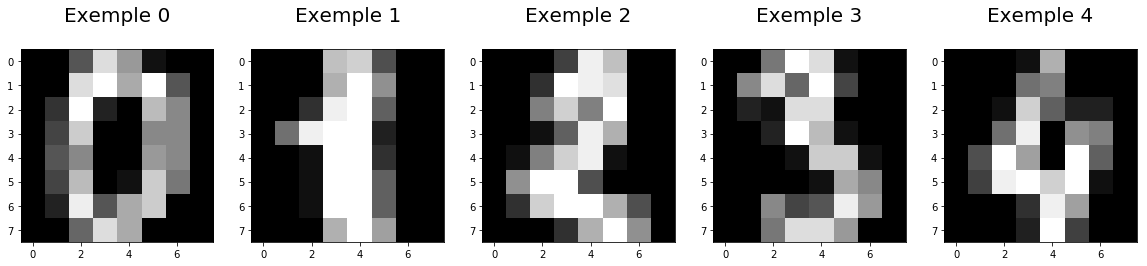

In [3]:
# Affichage de quelques exemples:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Exemple %i\n' % label, fontsize = 20)

In [5]:
# Modèle PCA: passe de 8x8=64 à 2 dimensions

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


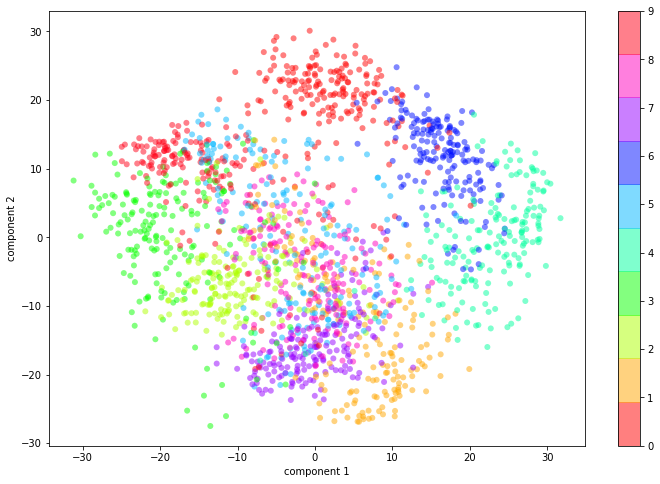

In [13]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('hsv', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
#plt.savefig('PCA-digits.pdf')

plt.show()

(Voir le choix des palettes de couleur sur https://matplotlib.org/users/colormaps.html)

La PCA sépare un peu les données par classes, mais on peut faire mieux !
